<a href="https://colab.research.google.com/github/auliadindabrilliani/folium_project_n3ts/blob/main/Aulia_Dinda_Brilliani_X_5_Kota_Singkawang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [24]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

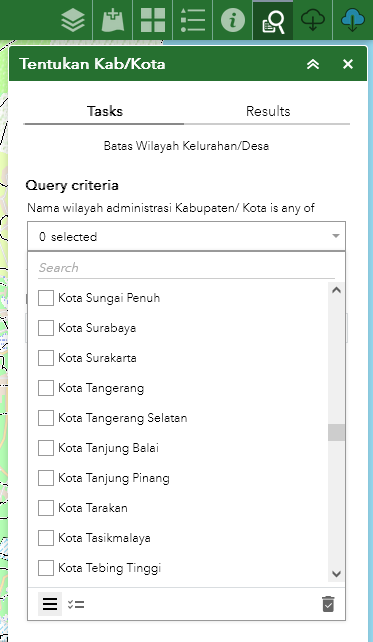

In [25]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Singkawang']

Mounted at /content/drive


In [28]:
# CSV file path
csv_path = '/content/singkawang_kelurahan.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, header = 0, delimiter= ';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['KELURAHAN'] = csv_data['KELURAHAN'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='KELURAHAN', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

            KELURAHAN  KEPALA KELUARGA
0               Sedau            32572
1          Sijangkung            10463
2          Pangmilang             4249
3            Sagatani             3151
4  SINGKAWANG SELATAN            50437
       OBJECTID       NAMOBJ       FCODE REMARK  \
47403   47404.0  Bagak Sahwa  BA03070040   None   
47784   47785.0   Bukit Batu  BA03070040   None   
47901   47902.0      Condong  BA03070040   None   
48256   48257.0         Jawa  BA03070040   None   
48606   48607.0        Kuala  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
47403  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47784  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47901  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
48256  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
48606  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
# Create a base map
m = folium.Map(location=[0.8998233,108.9759432], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["KELURAHAN", "KEPALA KELUARGA"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','KEPALA KELUARGA'],
        aliases=['KELURAHAN','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [30]:
# Create a base map
m = folium.Map(location=[6.9175, 107.6191], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Jumlah KK Kelurahan Tangsel",
    data=merged_gdf,
    columns=["KELURAHAN", "KEPALA KELUARGA"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('sman_singkawang.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Tangerang Selatan")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['NAMOBJ','KEPALA KELUARGA'],
        aliases=['KELURAHAN','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab:sedau,pasiran,roban

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?


```
# Ini diformat sebagai kode
```


Jawab:sagatani, sijangkung, sanggaukulor, nyarumkop, pajintan, mayasopa, condong, sungaibulan, melayu, tengah, sekiplama, jawa, sungaiwie, bukitbatu, sungaigaramhilir, setapukkecil, setapukbesar, semelagikecil